In [1]:
#basic bounding box detection
pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip3 install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import cv2
import imutils
import pytesseract
from pytesseract import image_to_string

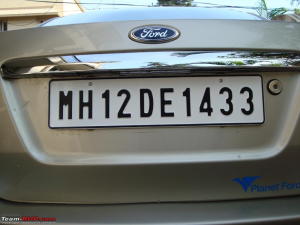

-1

In [24]:
from google.colab.patches import cv2_imshow
image = cv2.imread('test.jpeg')
image = imutils.resize(image, width=300 )
cv2_imshow(image)
cv2.waitKey(0)

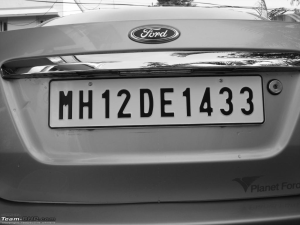

-1

In [27]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

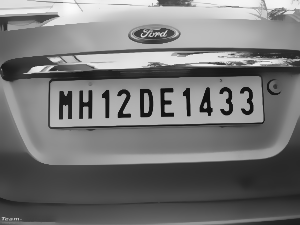

-1

In [29]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 
cv2_imshow( gray_image)
cv2.waitKey(0)

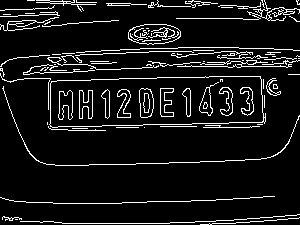

-1

In [30]:
edged = cv2.Canny(gray_image, 30, 200) 
cv2_imshow( edged)
cv2.waitKey(0)

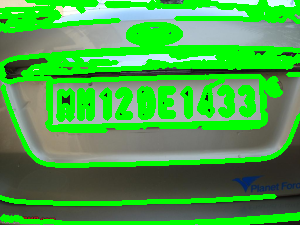

-1

In [32]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)
cv2.waitKey(0)

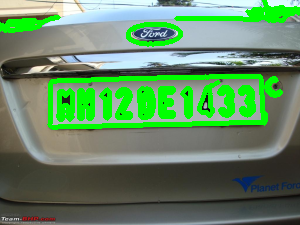

-1

In [33]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)
cv2.waitKey(0)

In [34]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx

In [35]:
x,y,w,h = cv2.boundingRect(c) 
new_img=image[y:y+h,x:x+w]
cv2.imwrite('./'+str(i)+'.png',new_img)
i+=1

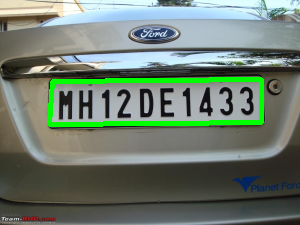

-1

In [36]:
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 3)
cv2_imshow(image)
cv2.waitKey(0)